
# <span style="color:rgb(213,80,0)">Dealing with tightly packed clusters</span>

The CLASSIX <samp>radius</samp> parameter controls the coarseness of the computed clusters. If it is set higher, then the cluster size tends to grow. When the clusters are not very well separated, it can become difficult to find a <samp>radius</samp> parameter that produces the right number of clusters. Let's demonstrate this with the following example of two tightly packed Gaussian blobs. We start with <samp>radius=0.1</samp>.


CLASSIX clustered 200000 data points with 2 features.
The radius parameter was set to 0.10 and MinPts was set to 1.
As the provided data was auto-scaled by a factor of 1/4.05,
points within a radius R=0.10*4.05=0.41 were grouped together.
In total, 3664460 distances were computed (18.3 per data point).
This resulted in 635 groups, each with a unique group center.
These 635 groups were subsequently merged into 12 clusters.
In order to explain the clustering of individual data points,
use explain(ind1) or explain(ind1,ind2) with indices of points.
Too many data points for plot. Randomly subsampled 1e5 points.


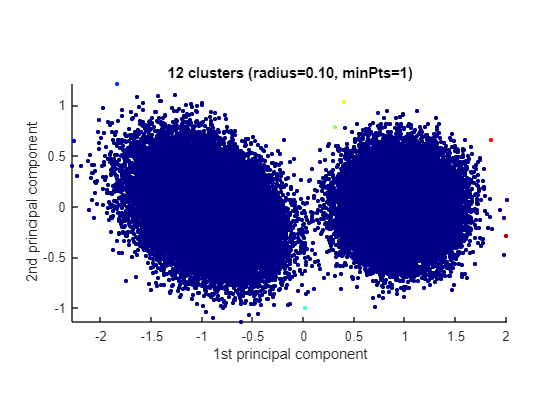

In [1]:
clear all
close all hidden
addpath ..
rng('default')                  % For reproducibility
mu1 = [2 2];                    % Mean of the 1st component
sigma1 = [2 0; 0 1];            % Covariance of the 1st component
mu2 = [-4 -3];                  % Mean of the 2nd component
sigma2 = [1 0; 0 1];            % Covariance of the 2nd component
r1 = mvnrnd(mu1,sigma1,1e5);
r2 = mvnrnd(mu2,sigma2,1e5);
data = [r1; r2];
ground_truth = [ones(1e5,1); 2*ones(1e5,1)];
[label, explain, out] = classix(data, 0.1, 1);
explain()


The data points between the two ground truth clusters are so close that even a small <samp>radius</samp> like 0.1 merges them together. Note also that we get 11 unwanted clusters with a small number of points. We could easily remove them by increasing <samp>minPts</samp>, but the two main clusters would still remain merged. Let's try a smaller radius.


CLASSIX clustered 200000 data points with 2 features.
The radius parameter was set to 0.02 and MinPts was set to 1.
As the provided data was auto-scaled by a factor of 1/4.05,
points within a radius R=0.02*4.05=0.08 were grouped together.
In total, 12320110 distances were computed (61.6 per data point).
This resulted in 8813 groups, each with a unique group center.
These 8813 groups were subsequently merged into 682 clusters.
In order to explain the clustering of individual data points,
use explain(ind1) or explain(ind1,ind2) with indices of points.
Too many data points for plot. Randomly subsampled 1e5 points.


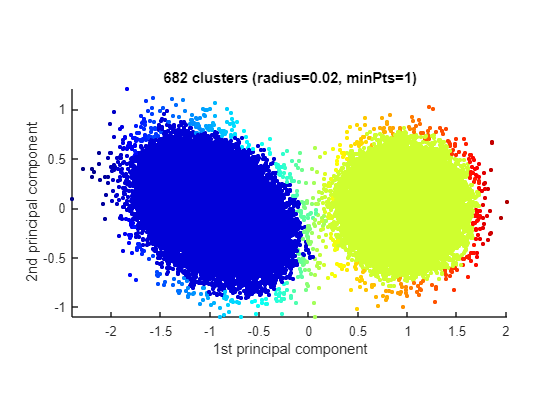

In [2]:
[label, explain, out] = classix(data, 0.02, 1);
explain()


Now the two ground truth clusters are separated but we have a large number of 680 unwanted clusters. We can find out about their cluster sizes by looking at <samp>out.cs</samp>:


In [3]:
cs_sort = sort(out.cs,'descend');
cs_sort(1:5) % display sizes of 5 largest clusters

ans = 5x1    
       99243
       98857
          45
          34
          31


The largest unwanted cluster contains 45 data points, so if we choose, say, <samp>minPts=50</samp>, we should end up with exactly two clusters:


In [4]:
tic
[label, explain, out] = classix(data, 0.02, 50);
toc

Elapsed time is 6.121746 seconds.

CLASSIX clustered 200000 data points with 2 features.
The radius parameter was set to 0.02 and MinPts was set to 50.
As the provided data was auto-scaled by a factor of 1/4.05,
points within a radius R=0.02*4.05=0.08 were grouped together.
In total, 12320110 distances were computed (61.6 per data point).
This resulted in 8813 groups, each with a unique group center.
These 8813 groups were subsequently merged into 2 clusters.
In order to explain the clustering of individual data points,
use explain(ind1) or explain(ind1,ind2) with indices of points.
Too many data points for plot. Randomly subsampled 1e5 points.


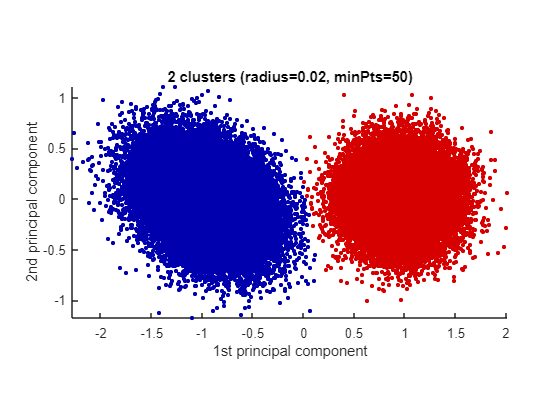

In [5]:
explain()


This looks very good. The adjusted Rand index confirms that we have succeeded in almost perfectly recovering the ground truth clusters:


In [6]:
rand_index(ground_truth,label,'adjusted')

ans = 0.9990

## An experimental option

The <samp>classix.m</samp> function accepts an optional flag called <samp>merge_tiny_groups</samp>. This parameter is <samp>true</samp> by default, resulting in the original CLASSIX method [1]. But when it is set to <samp>false</samp>, tiny groups with fewer than <samp>minPts</samp> points will be ignored in the merging phase and become stand-alone clusters first, before they are subsequently merged into a nearest bigger cluster. (That's different from the usual <samp>minPts</samp> criterion which applies to the size of clusters, not the size of individual groups.) This option can sometimes overcome 'creeping' between small groups, whereby clusters get merged simply because they are touched by low density groups. This allows us to cluster the tight Gaussian blobs using a much larger <samp>radius</samp> parameter. A larger <samp>radius</samp> parameter usually leads to faster clustering results, and so this can be the preferred option with tightly packed clusters.


In [7]:
opts = struct('merge_tiny_groups',0); % Don't merge tiny groups
tic;
[label, explain, out] = classix(data, 0.1, 50, opts); % Note the opts param
toc

Elapsed time is 0.554862 seconds.

CLASSIX clustered 200000 data points with 2 features.
The radius parameter was set to 0.10 and MinPts was set to 50.
As the provided data was auto-scaled by a factor of 1/4.05,
points within a radius R=0.10*4.05=0.41 were grouped together.
In total, 3664460 distances were computed (18.3 per data point).
This resulted in 635 groups, each with a unique group center.
These 635 groups were subsequently merged into 2 clusters.
In order to explain the clustering of individual data points,
use explain(ind1) or explain(ind1,ind2) with indices of points.
Too many data points for plot. Randomly subsampled 1e5 points.


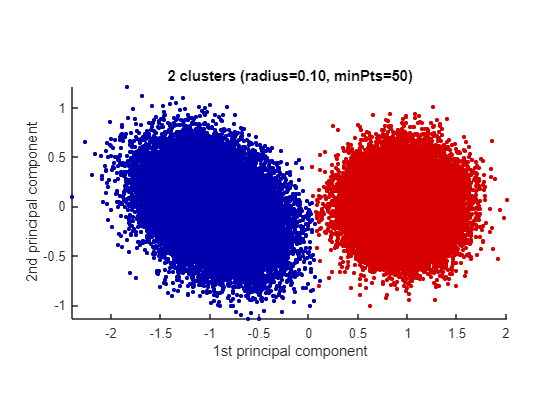

In [8]:
explain()

In [9]:
rand_index(ground_truth,label,'adjusted')

ans = 0.9989

## References

[1] X. Chen and S. Güttel. "Fast and explainable clustering based on sorting." arXiv: [https://arxiv.org/abs/2202.01456](https://arxiv.org/abs/2202.01456), 2022.

